# Supernova Distances and Redshift part 1

- First, explore fitting this data with the tecniques we have seen.
- Start from linear regression and polynomial regression
- For the case of  polynomial regression, just fit many of them for now.
- Let's bet based on intuition! Which fit is the best?
- In what cases are you underfitting the data?
- In what cases are you overfitting the data?
- Now split the data into training and validation sets
- Implement a cross-validation procedure
- Pick the best!
- Does it agree with our bets?

In [20]:
import numpy as np
import matplotlib.pylab as plt

from astroML.datasets import generate_mu_z

from astroML.linear_model import PolynomialRegression
from astroML.linear_model import LinearRegression
from astroML.linear_model import NadarayaWatson
from astroML.linear_model import BasisFunctionRegression

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold

plt.rcParams['figure.figsize'] = [10, 10]
plt.rcParams['font.size'] = 15

(35, 50)

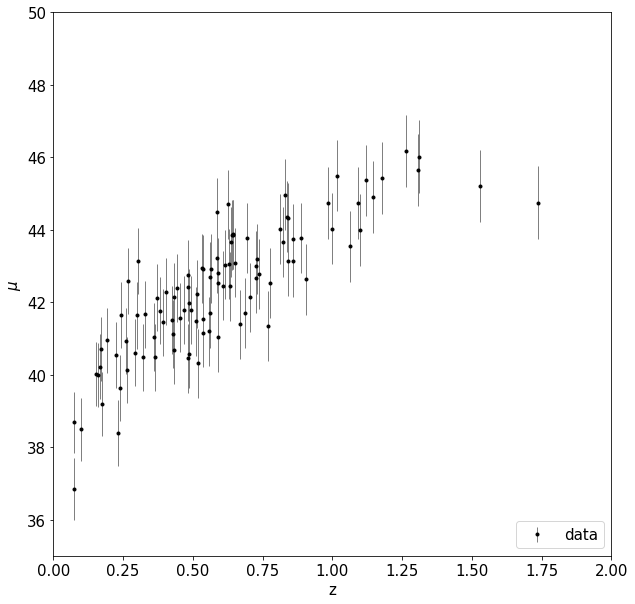

In [21]:
#Simple plot of the data

z_sample, mu_sample, dmu = generate_mu_z(100, random_state=1234)

plt.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1,label='data')
plt.xlabel("z")
plt.ylabel("$\mu$")
plt.legend(loc='lower right')
plt.xlim(0,2)
plt.ylim(35,50)

# Linear Regression

We initially fit our data with Linear Regression.

(35, 50)

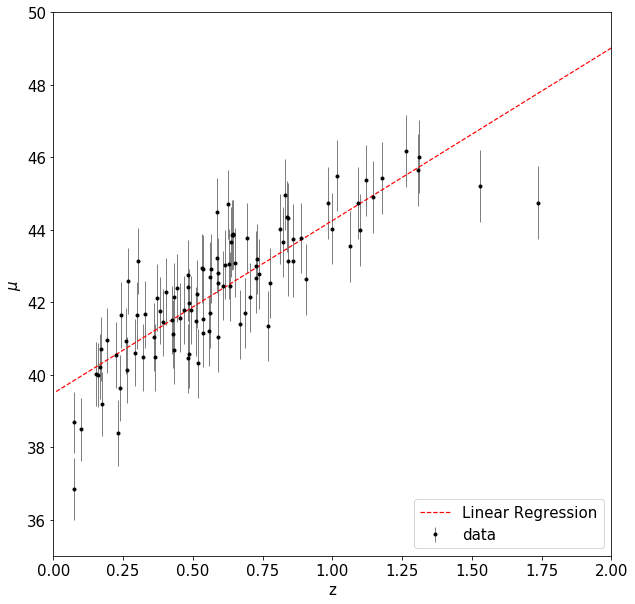

In [22]:
x_grid = np.linspace(0.01, 2.0, 100)

model = LinearRegression()
model.fit(z_sample[:, np.newaxis], mu_sample, dmu)
mu_fit = model.predict(x_grid[:, np.newaxis])

plt.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1,label='data')
plt.plot(x_grid, mu_fit, color='red', ls='--', lw=1.2, label='Linear Regression')
plt.xlabel("z")
plt.ylabel("$\mu$")
plt.legend(loc='lower right')
plt.xlim(0,2)
plt.ylim(35,50)

By eye we can say that Linear Regression underfit the data.

# Polynomial Regression

We try to fit the data with a Polynomial Regression.

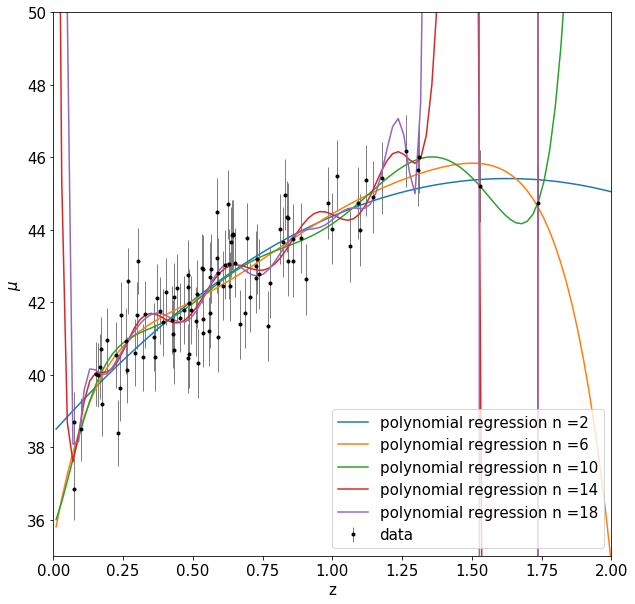

In [23]:
x_grid = np.linspace(0.01, 2.0, 100)

for i in np.arange(1,20)[1::4]:
    
    model = PolynomialRegression(i)
    model.fit(z_sample.reshape(-1,1), mu_sample, dmu)
    
    y_pred = model.predict(x_grid.reshape(-1,1))
    
    plt.plot(x_grid, y_pred, lw=1.5, label='polynomial regression n ='+str(i) )
    

plt.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1,label='data')
plt.xlabel("z")
plt.ylabel("$\mu$")
plt.legend(loc='lower right')
plt.xlim(0,2)
plt.ylim(35,50)
plt.legend(loc='lower right')
plt.show()

By eye the best fit seems to be the one with a 2 degree plynomial. We can state that the polynomials with degrees over 6 are not a good fit, since they overfit our data.

# Cross Validation

Now we split our data in traning and validation sets.

In [24]:
#training and validation

x = z_sample[:, np.newaxis]
y = mu_sample
dy = dmu
Y = np.array([y, dy]).T

x_train, x_validation, ydy_train, ydy_validation = train_test_split(x, Y, test_size=0.4, random_state=42)

y_train, dy_train = ydy_train.T

y_validation, dy_validation = ydy_validation.T

In [13]:
def rms_error(x, y, classif):
    return np.sqrt(np.sum((y - classif.predict(x))**2))/len(y)

def errors_cv(classif):
    classif.fit(x_train, y_train, dy_train)
    error_train = rms_error(x_train, y_train, classif)
    error_validation = rms_error(x_validation, y_validation, classif)
    return error_train, error_validation

In [14]:
#KFolds
kf = KFold(n_splits=5, shuffle=True, random_state=10)

In [16]:
#errors for Linear Regression

classif_lin = LinearRegression()
error_train, error_validation = errors_cv(classif_lin)
print('Train error for Linear Regression:', error_train)
print('Validation error for Linear Regression:', error_validation)

Train error for Linear Regression: 0.11147211051762662
Validation error for Linear Regression: 0.21493876770235731


Train error for Polynomial Regression: 0.11147211051762662 with index n= 1
Validation error for Polynomial Regression: 0.21493876770235731 with index n= 1 

Train error for Polynomial Regression: 0.10274226584487314 with index n= 2
Validation error for Polynomial Regression: 0.18822831900471454 with index n= 2 

Train error for Polynomial Regression: 0.10265841860989652 with index n= 3
Validation error for Polynomial Regression: 0.18934966571909206 with index n= 3 

Train error for Polynomial Regression: 0.09843242501429901 with index n= 4
Validation error for Polynomial Regression: 0.19140037585568526 with index n= 4 

Train error for Polynomial Regression: 0.09795804572373398 with index n= 5
Validation error for Polynomial Regression: 0.18920332278758853 with index n= 5 

Train error for Polynomial Regression: 0.09660318621191676 with index n= 6
Validation error for Polynomial Regression: 0.23160521808626305 with index n= 6 

Train error for Polynomial Regression: 0.09521011869275656

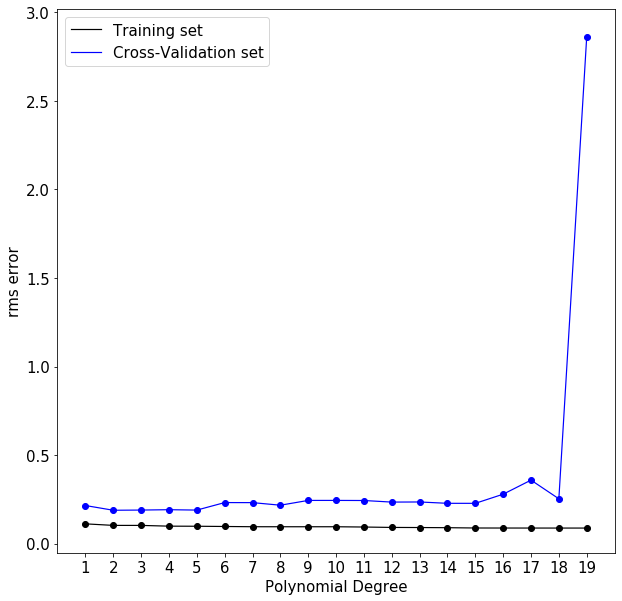

In [19]:
#errors for Polynomial Regression

N = np.arange(1, 20, dtype=int)

er_t = []
er_v = []

for i in N:
    classif_poly = PolynomialRegression(i)
    error_train, error_validation = errors_cv(classif_poly)
    print('Train error for Polynomial Regression:', error_train, 'with index n=', i)
    print('Validation error for Polynomial Regression:', error_validation, 'with index n=', i, '\n')
    
    er_t.append(error_train)
    er_v.append(error_validation)

plt.plot(N, er_t, label='Training set', color='black', lw=1.2)
plt.scatter(N, er_t, color='black')
plt.plot(N, er_v, label='Cross-Validation set', color='b', lw=1.2)
plt.scatter(N, er_v, color='b')
plt.xlabel('Polynomial Degree')
plt.ylabel('rms error')
plt.xticks(N)
plt.legend()
plt.show()

Now we want to fin the best model of the polynomial in order to fit our data.

In [9]:
#best fit
n_best = N[er_v == min(er_v)][0]
print('Best:', n_best)

Best: 4


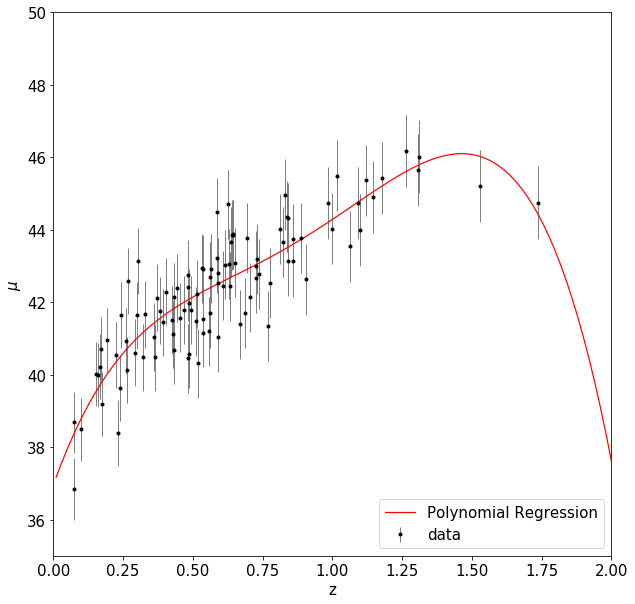

In [10]:
#fit with our data

#Polynomial Regression with best fit
poly = PolynomialRegression(n_best)
poly.fit(z_sample[:, np.newaxis], mu_sample, dmu)
y_grid = poly.predict(x_grid[:, np.newaxis])


#plot
plt.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1,label='data')
plt.plot(x_grid, y_grid, color='red', lw=1.2, label='Polynomial Regression')

plt.xlabel("z")
plt.ylabel("$\mu$")
plt.legend(loc='lower right')
plt.xlim(0,2)
plt.ylim(35,50)
plt.show()

By eye we found out that the best fit was the one with a Polynomial with degree equal to 2, by using Cross-Validation we found out that the best fit is the one with a Polynomial with degree equal to 4.

# Kernel Regression

We now do the same procedure as before but for Kernel Regression (Nadaraya-Watson Regression). In this case the free parameter is the bandwidth.

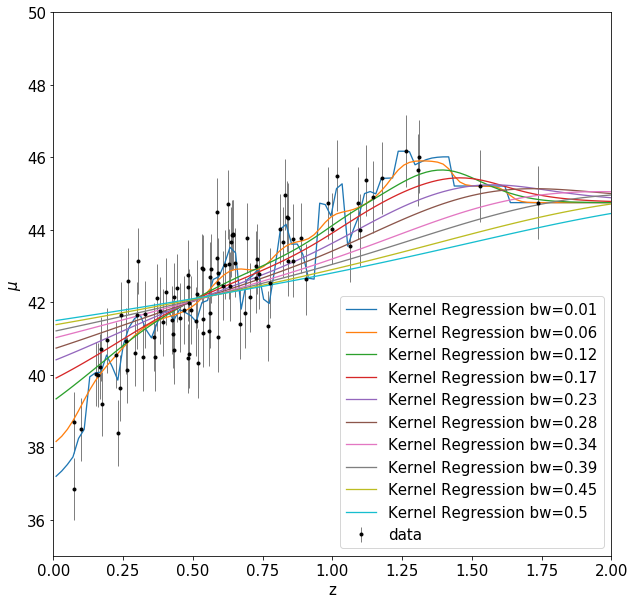

In [11]:
for bw in np.round(np.linspace(0.01, 0.5, 10), 2):
    model = NadarayaWatson(kernel='gaussian', h=bw)
    model.fit(z_sample[:, np.newaxis], mu_sample, dmu)
    
    y_pred = model.predict(x_grid[:, np.newaxis])
    plt.plot(x_grid, y_pred, label='Kernel Regression bw='+str(bw), lw=1.3)

#plot
plt.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1,label='data')   
plt.xlabel("z")
plt.ylabel("$\mu$")
plt.legend(loc='lower right')
plt.xlim(0,2)
plt.ylim(35,50)
plt.show()

Now we use Cross Validation to find the best value for the bandwidth.

Train error for Kernel Regression: 0.07491767391493546 with index bw= 0.01
Validation error for Kernel Regression: 0.15894200459224628 with index bw= 0.01 

Train error for Kernel Regression: 0.09968807987820247 with index bw= 0.035789473684210524
Validation error for Kernel Regression: 0.12895823147020838 with index bw= 0.035789473684210524 

Train error for Kernel Regression: 0.11123269717174769 with index bw= 0.06157894736842105
Validation error for Kernel Regression: 0.1251584356009077 with index bw= 0.06157894736842105 

Train error for Kernel Regression: 0.1170898498165837 with index bw= 0.08736842105263157
Validation error for Kernel Regression: 0.12590533515943325 with index bw= 0.08736842105263157 

Train error for Kernel Regression: 0.12158163985068765 with index bw= 0.1131578947368421
Validation error for Kernel Regression: 0.12724563640284797 with index bw= 0.1131578947368421 

Train error for Kernel Regression: 0.1263994546572532 with index bw= 0.13894736842105262
Validati

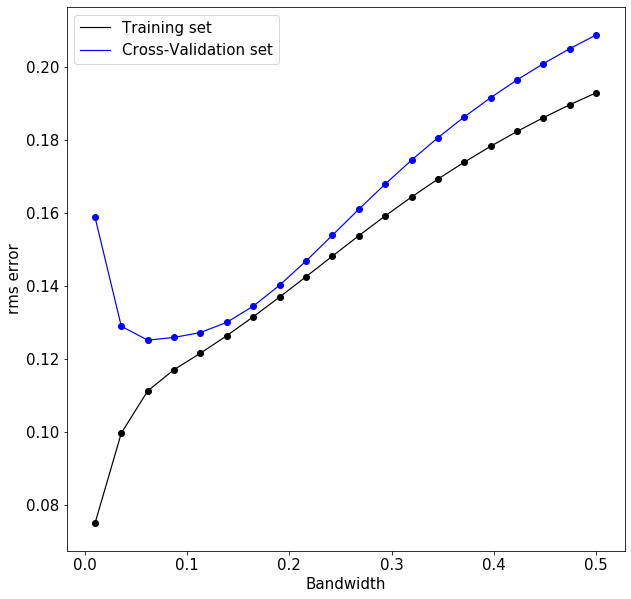

In [12]:
bandwidth = np.linspace(0.01, 0.5, 20)

k_er_t = []
k_er_v = []

for i in bandwidth:
    classif_kernel = NadarayaWatson(kernel='gaussian', h=i)
    error_train, error_validation = errors_cv(classif_kernel)
    print('Train error for Kernel Regression:', error_train, 'with index bw=', i)
    print('Validation error for Kernel Regression:', error_validation, 'with index bw=', i, '\n')
    
    k_er_t.append(error_train)
    k_er_v.append(error_validation)

plt.plot(bandwidth, k_er_t, label='Training set', color='black', lw=1.2)
plt.scatter(bandwidth, k_er_t, color='black')
plt.plot(bandwidth, k_er_v, label='Cross-Validation set', color='b', lw=1.2)
plt.scatter(bandwidth, k_er_v, color='b')
plt.xlabel('Bandwidth')
plt.ylabel('rms error')
plt.legend()
plt.show()

In [13]:
best_bandwidth = bandwidth[k_er_v == min(k_er_v)][0]
print('The best bandwidth is:', round(best_bandwidth, 2))

The best bandwidth is: 0.06


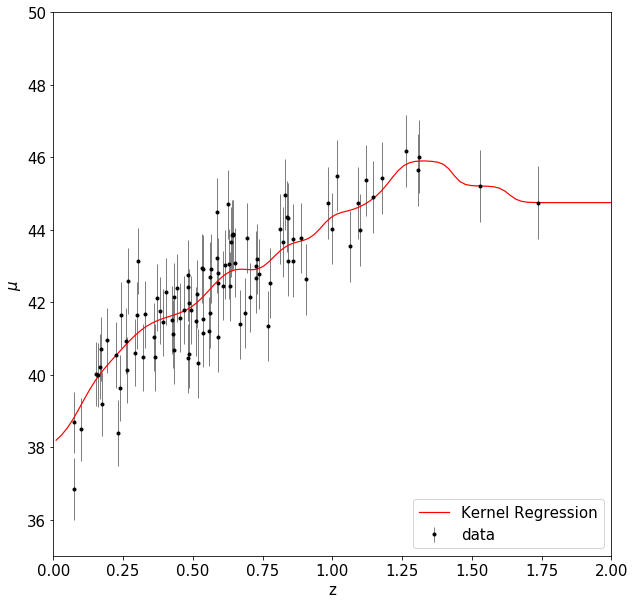

In [14]:
kernel = NadarayaWatson(kernel='gaussian', h=best_bandwidth)
kernel.fit(z_sample[:, np.newaxis], mu_sample, dmu)
y_grid = kernel.predict(x_grid[:, np.newaxis])


#plot
plt.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1,label='data')
plt.plot(x_grid, y_grid, color='red', lw=1.2, label='Kernel Regression')

plt.xlabel("z")
plt.ylabel("$\mu$")
plt.legend(loc='lower right')
plt.xlim(0,2)
plt.ylim(35,50)
plt.show()

# Basis Function Regression

In this case we have two free parameters sigma and mu of the gaussians.

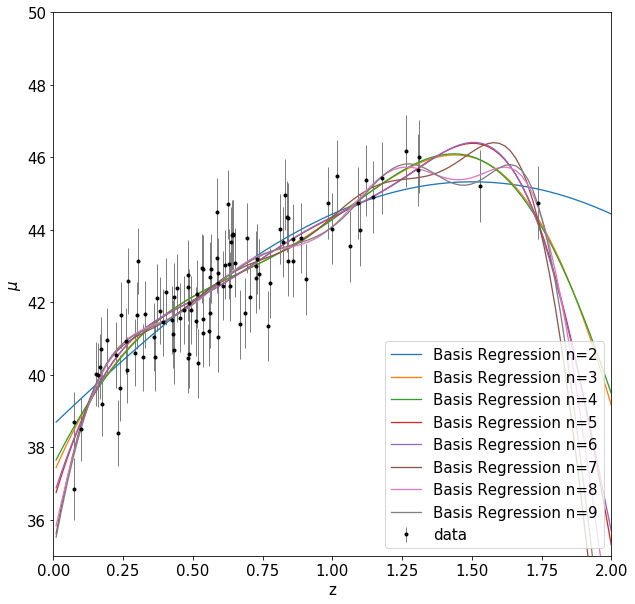

In [15]:
n = np.arange(2, 10)

for i in n:
    basis_mu = np.linspace(min(z_sample), max(z_sample), i)
    basis_sigma = basis_mu[1]-basis_mu[0]
    model = BasisFunctionRegression('gaussian', mu=basis_mu[:, np.newaxis], sigma=basis_sigma)
    model.fit(z_sample[:, np.newaxis], mu_sample, dmu)
    
    y_pred = model.predict(x_grid[:, np.newaxis])
    plt.plot(x_grid, y_pred, label='Basis Regression n=%i'%i, lw=1.3)

#plot
plt.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1,label='data')   
plt.xlabel("z")
plt.ylabel("$\mu$")
plt.legend(loc='lower right')
plt.xlim(0,2)
plt.ylim(35,50)
plt.show()

Train error for Kernel Regression: 0.12360037888612414 with index n= 2
Validation error for Kernel Regression: 0.13337772799431896 with index n= 2 

Train error for Kernel Regression: 0.12360037888612414 with index n= 2
Validation error for Kernel Regression: 0.13337772799431896 with index n= 2 

Train error for Kernel Regression: 0.11928169594859855 with index n= 3
Validation error for Kernel Regression: 0.1278486566666676 with index n= 3 

Train error for Kernel Regression: 0.11988852249775642 with index n= 4
Validation error for Kernel Regression: 0.12789314773869845 with index n= 4 

Train error for Kernel Regression: 0.11988852249775642 with index n= 4
Validation error for Kernel Regression: 0.12789314773869845 with index n= 4 

Train error for Kernel Regression: 0.11800956697641274 with index n= 5
Validation error for Kernel Regression: 0.1302684329746412 with index n= 5 

Train error for Kernel Regression: 0.11802297274785287 with index n= 6
Validation error for Kernel Regressio

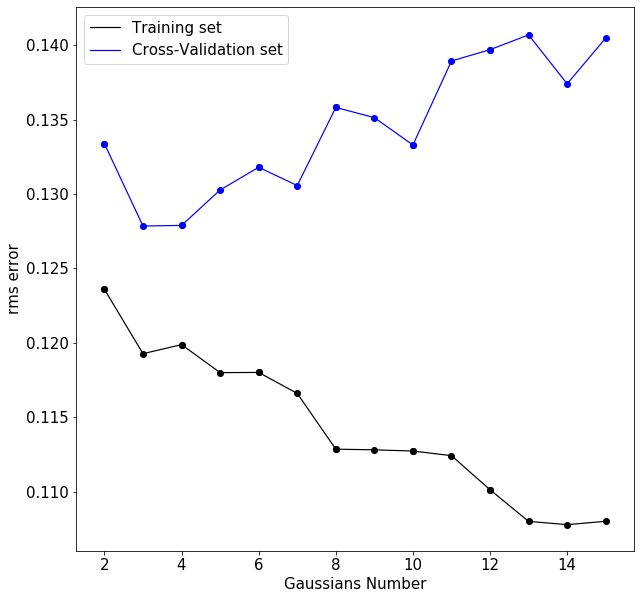

In [16]:
num = np.linspace(2, 15, 20, dtype=int)

b_er_t = []
b_er_v = []

for i in num:
    basis_mu = np.linspace(min(z_sample), max(z_sample), i)
    basis_sigma = basis_mu[1]-basis_mu[0]
    
    classif_basis = BasisFunctionRegression('gaussian', mu=basis_mu[:, np.newaxis], sigma=basis_sigma)
    error_train, error_validation = errors_cv(classif_basis)
    print('Train error for Kernel Regression:', error_train, 'with index n=', i)
    print('Validation error for Kernel Regression:', error_validation, 'with index n=', i, '\n')
    
    b_er_t.append(error_train)
    b_er_v.append(error_validation)

plt.plot(num, b_er_t, label='Training set', color='black', lw=1.2)
plt.scatter(num, b_er_t, color='black')
plt.plot(num, b_er_v, label='Cross-Validation set', color='b', lw=1.2)
plt.scatter(num, b_er_v, color='b')
plt.xlabel('Gaussians Number')
plt.ylabel('rms error')
plt.legend()
plt.show()  

In [17]:
best_gauss = num[b_er_v == min(b_er_v)][0]
print('The best gaussian number is:', best_gauss)

The best gaussian number is: 3


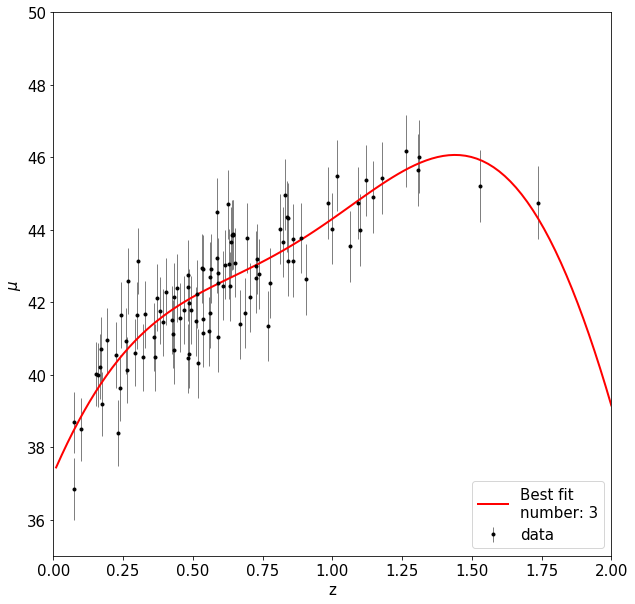

In [18]:
basis_mu = np.linspace(min(z_sample), max(z_sample), best_gauss)
basis_sigma = basis_mu[1]-basis_mu[0]

basis = BasisFunctionRegression('gaussian', mu=basis_mu[:, np.newaxis], sigma=basis_sigma)
basis.fit(z_sample[:, np.newaxis], mu_sample, dmu)
y_grid = basis.predict(x_grid[:, np.newaxis])


#plot
plt.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1,label='data')
plt.plot(x_grid, y_grid, lw=2, c='red', label='Best fit\nnumber: %i' %best_gauss) 

plt.xlabel("z")
plt.ylabel("$\mu$")
plt.legend(loc='lower right')
plt.xlim(0,2)
plt.ylim(35,50)
plt.show()